In [3]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

In [5]:
df_microsoft = pdr.get_data_yahoo('MSFT')
df_microsoft

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-04,84.430000,80.699997,84.419998,81.080002,39094900.0,76.354225
2017-12-05,82.680000,80.980003,81.339996,81.589996,26152300.0,76.834503
2017-12-06,83.139999,81.430000,81.550003,82.779999,26162100.0,77.955154
2017-12-07,82.800003,82.000000,82.540001,82.489998,23184500.0,77.682053
2017-12-08,84.580002,83.330002,83.629997,84.160004,24489100.0,79.254723
...,...,...,...,...,...,...
2022-11-28,246.649994,240.800003,246.080002,241.759995,24778200.0,241.759995
2022-11-29,242.789993,238.210007,241.399994,240.330002,17956300.0,240.330002
2022-11-30,255.330002,239.860001,240.570007,255.139999,47594200.0,255.139999


In [6]:
## Simple Moving Average ( i.e Smoothening the Curve)

In [16]:
df_microsoft['Open:10 days rolling'] = df_microsoft['Open'].rolling(window=10, min_periods=1).mean()
df_microsoft.head()

,High,Low,Open,Close,Volume,Adj Close,Open:10 days rolling
Date,,,,,,,
2017-12-04,84.430000,80.699997,84.419998,81.080002,39094900.0,76.354225,84.419998
2017-12-05,82.680000,80.980003,81.339996,81.589996,26152300.0,76.834503,82.879997
2017-12-06,83.139999,81.430000,81.550003,82.779999,26162100.0,77.955154,82.436666
2017-12-07,82.800003,82.000000,82.540001,82.489998,23184500.0,77.682053,82.462500
2017-12-08,84.580002,83.330002,83.629997,84.160004,24489100.0,79.254723,82.695999


In [17]:
df_microsoft['Open:10 days rolling'] = df_microsoft['Open'].rolling(window=10, min_periods=5).mean()
df_microsoft.head()

,High,Low,Open,Close,Volume,Adj Close,Open:10 days rolling
Date,,,,,,,
2017-12-04,84.430000,80.699997,84.419998,81.080002,39094900.0,76.354225,NaN
2017-12-05,82.680000,80.980003,81.339996,81.589996,26152300.0,76.834503,NaN
2017-12-06,83.139999,81.430000,81.550003,82.779999,26162100.0,77.955154,NaN
2017-12-07,82.800003,82.000000,82.540001,82.489998,23184500.0,77.682053,NaN
2017-12-08,84.580002,83.330002,83.629997,84.160004,24489100.0,79.254723,82.695999


<AxesSubplot:xlabel='Date'>

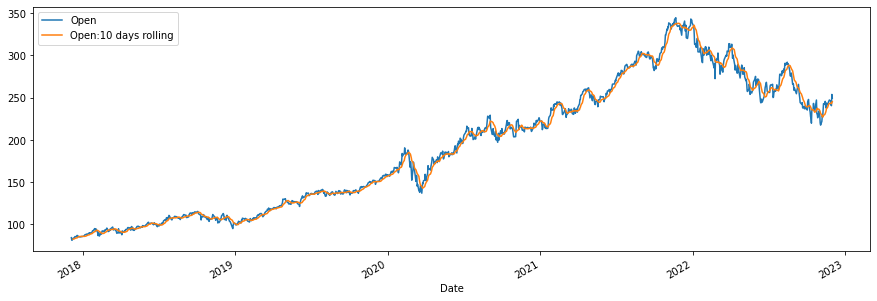

In [24]:
df_microsoft[['Open', 'Open:10 days rolling']].plot(figsize=(15,5))

<AxesSubplot:xlabel='Date'>

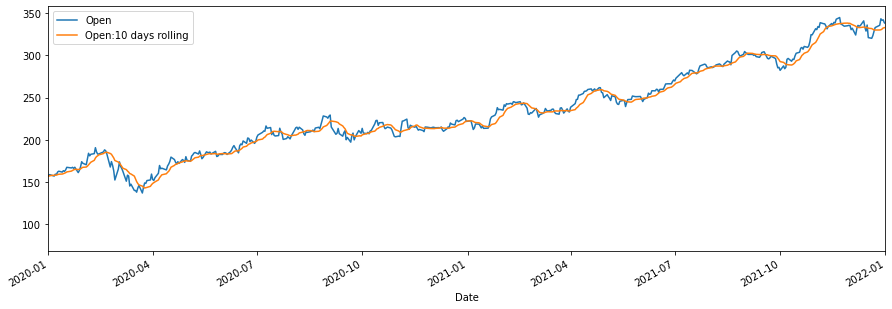

In [28]:
df_microsoft[['Open', 'Open:10 days rolling']].plot(xlim = ['2020-01-01','2022-01-01'], figsize=(15,5))

<AxesSubplot:xlabel='Date'>

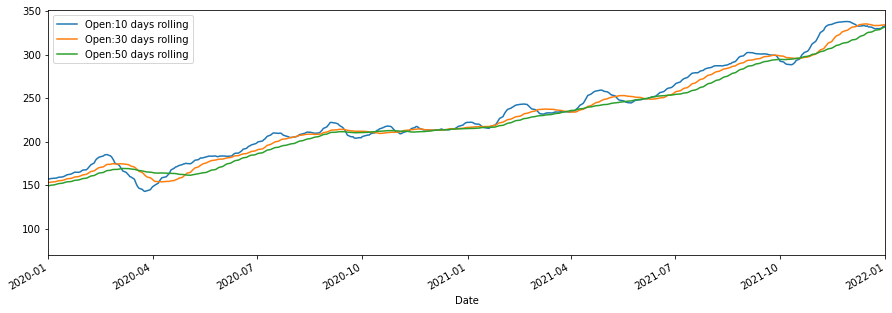

In [32]:
df_microsoft['Open:10 days rolling'] = df_microsoft['Open'].rolling(window=10, min_periods=1).mean()
df_microsoft['Open:30 days rolling'] = df_microsoft['Open'].rolling(window=30, min_periods=1).mean()
df_microsoft['Open:50 days rolling'] = df_microsoft['Open'].rolling(window=50, min_periods=1).mean()
df_microsoft[['Open:10 days rolling', 'Open:30 days rolling', 'Open:50 days rolling']].plot(xlim=['2020-01-01', '2022-01-01'], figsize=(15,5))

In [33]:
### EXPANDING
### CUMMULATIVE MOVING AVERAGE

In [34]:
df_microsoft['Open'].expanding().mean().head()

Date
2017-12-04    84.419998
2017-12-05    82.879997
2017-12-06    82.436666
2017-12-07    82.462500
2017-12-08    82.695999
Name: Open, dtype: float64

<AxesSubplot:xlabel='Date'>

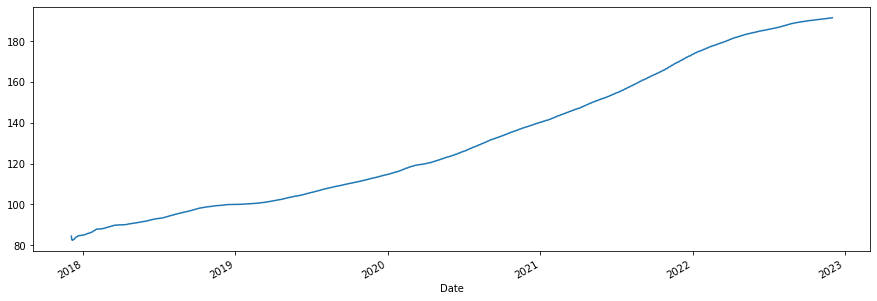

In [35]:
df_microsoft['Open'].expanding().mean().plot(figsize=(15,5))

In [37]:
##Exponential Moving Average (EMA)

## Formula:  ((close -Prev EMA)*multiplier)+ Prev EMA
## Multiplier Formula:  (2/10+1)      # 10 is the rolling

In [40]:
## EMA Microsoft shares
# Let's smoothing factor - 0.1
df_microsoft['EMA_0.1'] = df_microsoft['Open'].ewm(alpha=0.1, adjust=False).mean()
df_microsoft

,High,Low,Open,Close,Volume,Adj Close,Open:10 days rolling,Open:30 days rolling,Open:50 days rolling,EMA_0.1
Date,,,,,,,,,,
2017-12-04,84.430000,80.699997,84.419998,81.080002,39094900.0,76.354225,84.419998,84.419998,84.419998,84.419998
2017-12-05,82.680000,80.980003,81.339996,81.589996,26152300.0,76.834503,82.879997,82.879997,82.879997,84.111998
2017-12-06,83.139999,81.430000,81.550003,82.779999,26162100.0,77.955154,82.436666,82.436666,82.436666,83.855798
2017-12-07,82.800003,82.000000,82.540001,82.489998,23184500.0,77.682053,82.462500,82.462500,82.462500,83.724219
2017-12-08,84.580002,83.330002,83.629997,84.160004,24489100.0,79.254723,82.695999,82.695999,82.695999,83.714797
...,...,...,...,...,...,...,...,...,...,...
2022-11-28,246.649994,240.800003,246.080002,241.759995,24778200.0,241.759995,243.524998,236.442333,236.945799,239.905008
2022-11-29,242.789993,238.210007,241.399994,240.330002,17956300.0,240.330002,243.465997,236.628333,236.924399,240.054506
2022-11-30,255.330002,239.860001,240.570007,255.139999,47594200.0,255.139999,242.956998,236.539333,236.894399,240.106056


<AxesSubplot:xlabel='Date'>

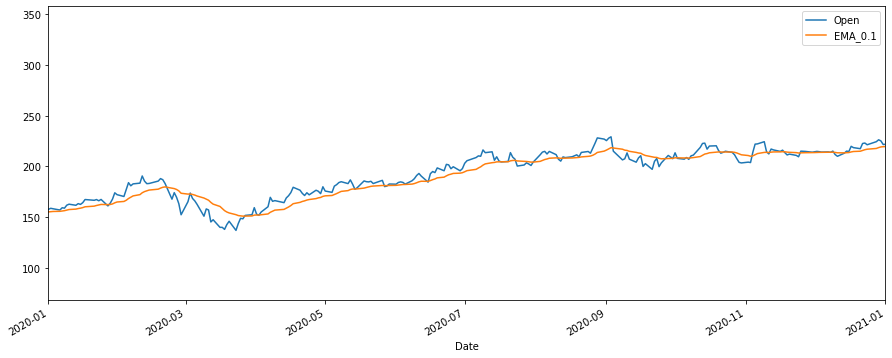

In [45]:
df_microsoft[['Open', 'EMA_0.1']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15,6))

In [44]:
#Lets try Smoothening = 0.3
df_microsoft['EMA_0.3'] = df_microsoft['Open'].ewm(alpha=0.3, adjust=False).mean()
df_microsoft

,High,Low,Open,Close,Volume,Adj Close,Open:10 days rolling,Open:30 days rolling,Open:50 days rolling,EMA_0.1,EMA_0.13,EMA_0.3
Date,,,,,,,,,,,,
2017-12-04,84.430000,80.699997,84.419998,81.080002,39094900.0,76.354225,84.419998,84.419998,84.419998,84.419998,84.419998,84.419998
2017-12-05,82.680000,80.980003,81.339996,81.589996,26152300.0,76.834503,82.879997,82.879997,82.879997,84.111998,83.495998,83.495998
2017-12-06,83.139999,81.430000,81.550003,82.779999,26162100.0,77.955154,82.436666,82.436666,82.436666,83.855798,82.912199,82.912199
2017-12-07,82.800003,82.000000,82.540001,82.489998,23184500.0,77.682053,82.462500,82.462500,82.462500,83.724219,82.800540,82.800540
2017-12-08,84.580002,83.330002,83.629997,84.160004,24489100.0,79.254723,82.695999,82.695999,82.695999,83.714797,83.049377,83.049377
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-28,246.649994,240.800003,246.080002,241.759995,24778200.0,241.759995,243.524998,236.442333,236.945799,239.905008,244.678950,244.678950
2022-11-29,242.789993,238.210007,241.399994,240.330002,17956300.0,240.330002,243.465997,236.628333,236.924399,240.054506,243.695263,243.695263
2022-11-30,255.330002,239.860001,240.570007,255.139999,47594200.0,255.139999,242.956998,236.539333,236.894399,240.106056,242.757686,242.757686


<AxesSubplot:xlabel='Date'>

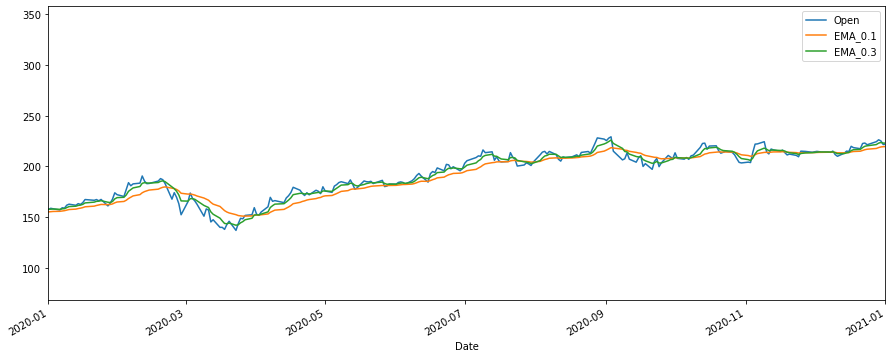

In [50]:
df_microsoft[['Open', 'EMA_0.1', 'EMA_0.3']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15,6))

# It looks like Green line which means EMA_0.3 is giving better smoothening

In [51]:
#Droppping the mistakenly created column
df_microsoft.drop('EMA_0.13', inplace=True, axis=1)
df_microsoft

KeyError: "['EMA_0.13'] not found in axis"

In [52]:
# EXPONENTIAL WEIGHTED MOVING AVERAGE (EWMA)-It should be done on the upcoming data or mainly on the recent data for better projection
# Use for Preventing Laggs

In [63]:
## Creating new column to hold 5-day exponentially weightted moving average

df_microsoft['EMA_5days'] = df_microsoft['Open'].ewm(span=5, adjust=False).mean()
df_microsoft['EMA_5days']

Date
2017-12-04     84.419998
2017-12-05     83.393331
2017-12-06     82.778888
2017-12-07     82.699259
2017-12-08     83.009505
                 ...    
2022-11-28    244.983418
2022-11-29    243.788943
2022-11-30    242.715965
2022-12-01    246.433975
2022-12-02    247.562652
Name: EMA_5days, Length: 1259, dtype: float64

<AxesSubplot:xlabel='Date'>

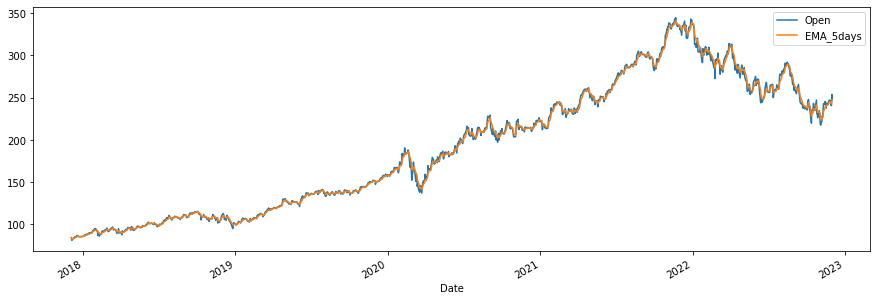

In [65]:
df_microsoft[['Open', 'EMA_5days']].plot(figsize=(15,5))